# Solution {-}

A sequence of discrete samples of a Gauss-Markov process can be generated using the following difference equation

\begin{equation*}
  X_{k+1}=e^{-\beta \Delta t}X_k + W_k
\end{equation*}

An estimate of the autocorrelation function for $X_k$ sequence can be calculated as follows:

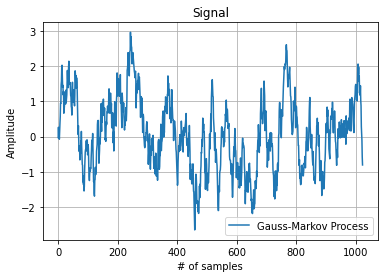

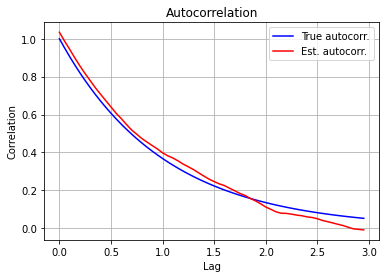

In [3]:
from numpy import exp, sqrt
import matplotlib.pyplot as plt

# Initialize
s = 1024
m = 60
X = []; r_true = []; r_est = []
sigma = 1
beta = 1
dt = 0.05

# White noise sequence
varW = 1 - exp(-2*beta*dt)
sigmaW = sqrt(varW)

# Transition matrix
phi = exp(-beta*dt)

x = 0
randn = np.random.normal(0, 1, s)
for i in range(0, s):
    x = phi*x + sigmaW*randn[i]
    X.append(x)

tau = np.arange(0, 3, dt)
for i in range(0, m):
    r_true.append(exp(-beta*dt*i))

slag = X
X = np.array(X)

for j in range(0, m):
    lag = j*[0] + slag[:(s-j)]
    r_est.append((X@lag)/(s-j))

plt.plot(X, label = 'Gauss-Markov Process')
plt.title('Signal')
plt.xlabel('# of samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

plt.plot(tau, r_true, 'b', label='True autocorr.')
plt.plot(tau, r_est, 'r', label='Est. autocorr.')
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.legend()
plt.grid()
plt.show()